In [14]:
%matplotlib inline
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
df = pd.read_csv('D:/DS/aspiration.ai/RAYMOND.csv')

In [69]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RAYMOND,EQ,15-May-2017,763.45,765.00,779.00,757.05,773.9,772.80,770.09,292498,2.252491e+08,9033,55467,18.96
1,RAYMOND,EQ,16-May-2017,772.80,773.45,801.45,768.10,783.5,785.00,788.89,823956,6.500070e+08,18238,179377,21.77
2,RAYMOND,EQ,17-May-2017,785.00,786.00,804.95,778.40,785.5,783.65,792.72,598094,4.741212e+08,13968,127637,21.34
3,RAYMOND,EQ,18-May-2017,783.65,779.35,779.95,740.20,744.0,746.95,762.57,319834,2.438956e+08,7713,92200,28.83
4,RAYMOND,EQ,19-May-2017,746.95,748.00,767.50,714.00,722.0,723.10,740.30,561346,4.155619e+08,13328,137648,24.52


In [9]:
pandas_profiling.ProfileReport(df)

Number of variables,15
Number of observations,494
Total Missing (%),0.0%
Total size in memory,58.0 KiB
Average record size in memory,120.2 B
Numeric,4
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,10


In [70]:
df.isnull().any()

Symbol                    False
Series                    False
Date                      False
Prev Close                False
Open Price                False
High Price                False
Low Price                 False
Last Price                False
Close Price               False
Average Price             False
Total Traded Quantity     False
Turnover                  False
No. of Trades             False
Deliverable Qty           False
% Dly Qt to Traded Qty    False
dtype: bool

In [71]:
df = df.drop(['Symbol', 'Series', 'Prev Close', 'Last Price', 'Turnover', 'No. of Trades', 'Deliverable Qty', '% Dly Qt to Traded Qty'], axis = 1)

In [72]:
df.head()

,Date,Open Price,High Price,Low Price,Close Price,Average Price,Total Traded Quantity
0,15-May-2017,765.00,779.00,757.05,772.80,770.09,292498
1,16-May-2017,773.45,801.45,768.10,785.00,788.89,823956
2,17-May-2017,786.00,804.95,778.40,783.65,792.72,598094
3,18-May-2017,779.35,779.95,740.20,746.95,762.57,319834
4,19-May-2017,748.00,767.50,714.00,723.10,740.30,561346


# 5.1

In [130]:
df['returns'] = df['Close Price'].pct_change()

In [131]:
df['daily_mean'] = df['returns'].mean()
df['daily_std'] = df['returns'].std()

In [132]:
df = df.dropna()

In [133]:
df['annual_mean'] = round(df['daily_mean'] * 252,2)
df['annual_std'] = round(df['daily_std'] * np.sqrt(252),2)

In [164]:
df['sharpe_ratio'] = df['annual_mean']/df['annual_std']

In [165]:
df.head()

,Date,Open Price,High Price,Low Price,Close Price,Average Price,Total Traded Quantity,returns,daily_mean,daily_std,annual_mean,annual_std,sharpe_ratio
2,17-May-2017,786.00,804.95,778.40,783.65,792.72,598094,-0.001720,0.000246,0.022932,0.06,0.36,0.166667
3,18-May-2017,779.35,779.95,740.20,746.95,762.57,319834,-0.046832,0.000246,0.022932,0.06,0.36,0.166667
4,19-May-2017,748.00,767.50,714.00,723.10,740.30,561346,-0.031930,0.000246,0.022932,0.06,0.36,0.166667
5,22-May-2017,728.30,741.30,705.50,715.95,724.56,384821,-0.009888,0.000246,0.022932,0.06,0.36,0.166667
6,23-May-2017,713.00,723.80,681.25,699.55,699.33,501206,-0.022907,0.000246,0.022932,0.06,0.36,0.166667


# 5.2

In [154]:
axis = pd.read_csv('D:/DS/AXISBANK.csv')
cipla = pd.read_csv('D:/DS/CIPLA.csv')
fortis = pd.read_csv('D:/DS/FORTIS.csv')
jet = pd.read_csv('D:/DS/JETAIRWAYS.csv')
titan = pd.read_csv('D:/DS/TITAN.csv')

In [155]:
axis = axis.rename(index = str, columns={"Close Price": "axis_cp"})
cipla = cipla.rename(index = str, columns={"Close Price": "cipla_cp"})
fortis = fortis.rename(index = str, columns={"Close Price": "fortis_cp"})
jet = jet.rename(index = str, columns={"Close Price": "jet_cp"})
titan = titan.rename(index = str, columns={"Close Price": "titan_cp"})

In [156]:
portfolio = pd.DataFrame(axis.axis_cp)

In [158]:
cipla, portfolio = [d.reset_index(drop=True) for d in (cipla, portfolio)]
portfolio = portfolio.join(cipla['cipla_cp'])

In [159]:
fortis, portfolio = [d.reset_index(drop=True) for d in (fortis, portfolio)]
portfolio = portfolio.join(fortis['fortis_cp'])

In [161]:
jet, portfolio = [d.reset_index(drop=True) for d in (jet, portfolio)]
portfolio = portfolio.join(jet['jet_cp'])

In [162]:
titan, portfolio = [d.reset_index(drop=True) for d in (titan, portfolio)]
portfolio = portfolio.join(titan['titan_cp'])

In [225]:
portfolio.head()

,axis_cp,cipla_cp,fortis_cp,jet_cp,titan_cp
0,500.1,569.00,205.25,527.50,483.65
1,501.5,565.60,207.90,534.15,488.30
2,502.8,562.35,205.90,528.90,481.75
3,492.0,560.10,196.85,522.70,471.65
4,501.7,564.95,203.55,520.40,471.15


In [226]:
# create the correlation matrix
corr_matrix = np.corrcoef(portfolio)

In [227]:
#convert daily stock prices into daily returns
returns = portfolio.pct_change()

In [228]:
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

In [229]:
mean_daily_returns

axis_cp      0.000924
cipla_cp     0.000079
fortis_cp   -0.000577
jet_cp      -0.001905
titan_cp     0.001924
dtype: float64

In [230]:
cov_matrix

,axis_cp,cipla_cp,fortis_cp,jet_cp,titan_cp
axis_cp,0.000306,4.983340e-05,0.000034,8.850490e-05,0.000014
cipla_cp,0.000050,2.558973e-04,0.000008,-3.240530e-07,0.000033
fortis_cp,0.000034,8.321517e-06,0.000704,6.939881e-05,0.000060
jet_cp,0.000089,-3.240530e-07,0.000069,1.546238e-03,0.000048
titan_cp,0.000014,3.292739e-05,0.000060,4.814941e-05,0.000418


In [278]:
#set number of runs of random portfolio weights
num_portfolios = 25000

In [279]:
stock = ['Axis', 'Cipla', 'Fortis', 'Jet', 'Titan']

In [280]:
#increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stock)-1,num_portfolios))

In [281]:
# portfolio weights
w = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [282]:
for i in range(num_portfolios):
    portfolio_return = np.sum(mean_daily_returns * w) * 252
    portfolio_vol = np.sqrt(np.dot(w.T,np.dot(cov_matrix, w))) * np.sqrt(252)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #portfolio_sharpe = portfolio_return / portfolio_vol 
    results[2,i] = results[0,i]/results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(w)):
        results[j+3,i] = w[j]

In [283]:
result_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stock[0],stock[1],stock[2],stock[3],stock[4]])

In [284]:
result_frame.head()

,ret,stdev,sharpe,Axis,Cipla,Fortis,Jet,Titan
0,0.022398,0.201763,0.111013,0.2,0.2,0.2,0.2,0.2
1,0.022398,0.201763,0.111013,0.2,0.2,0.2,0.2,0.2
2,0.022398,0.201763,0.111013,0.2,0.2,0.2,0.2,0.2
3,0.022398,0.201763,0.111013,0.2,0.2,0.2,0.2,0.2
4,0.022398,0.201763,0.111013,0.2,0.2,0.2,0.2,0.2


In [285]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = result_frame.iloc[result_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = result_frame.iloc[result_frame['stdev'].idxmin()]

In [286]:
max_sharpe_port

ret       0.022398
stdev     0.201763
sharpe    0.111013
Axis      0.200000
Cipla     0.200000
Fortis    0.200000
Jet       0.200000
Titan     0.200000
Name: 0, dtype: float64

In [287]:
min_vol_port

ret       0.022398
stdev     0.201763
sharpe    0.111013
Axis      0.200000
Cipla     0.200000
Fortis    0.200000
Jet       0.200000
Titan     0.200000
Name: 0, dtype: float64

In [288]:
min_vol_port[1]

0.20176316294173507

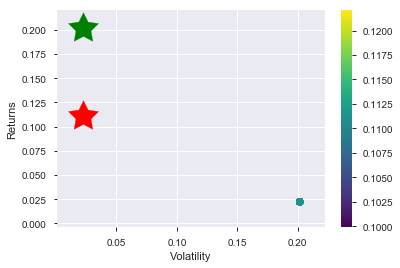

In [291]:
plt.scatter(result_frame.stdev, result_frame.ret, c=result_frame.sharpe, cmap='viridis')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
plt.scatter(max_sharpe_port[0],max_sharpe_port[2], marker = (5,1,0),color='r',s=1000)
plt.scatter(min_vol_port[0],min_vol_port[1],marker = (5,1,0), color='g',s=1000)